# Explore here

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
#Conocimiento del dataset
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [64]:
#Mirar si hay nulos
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


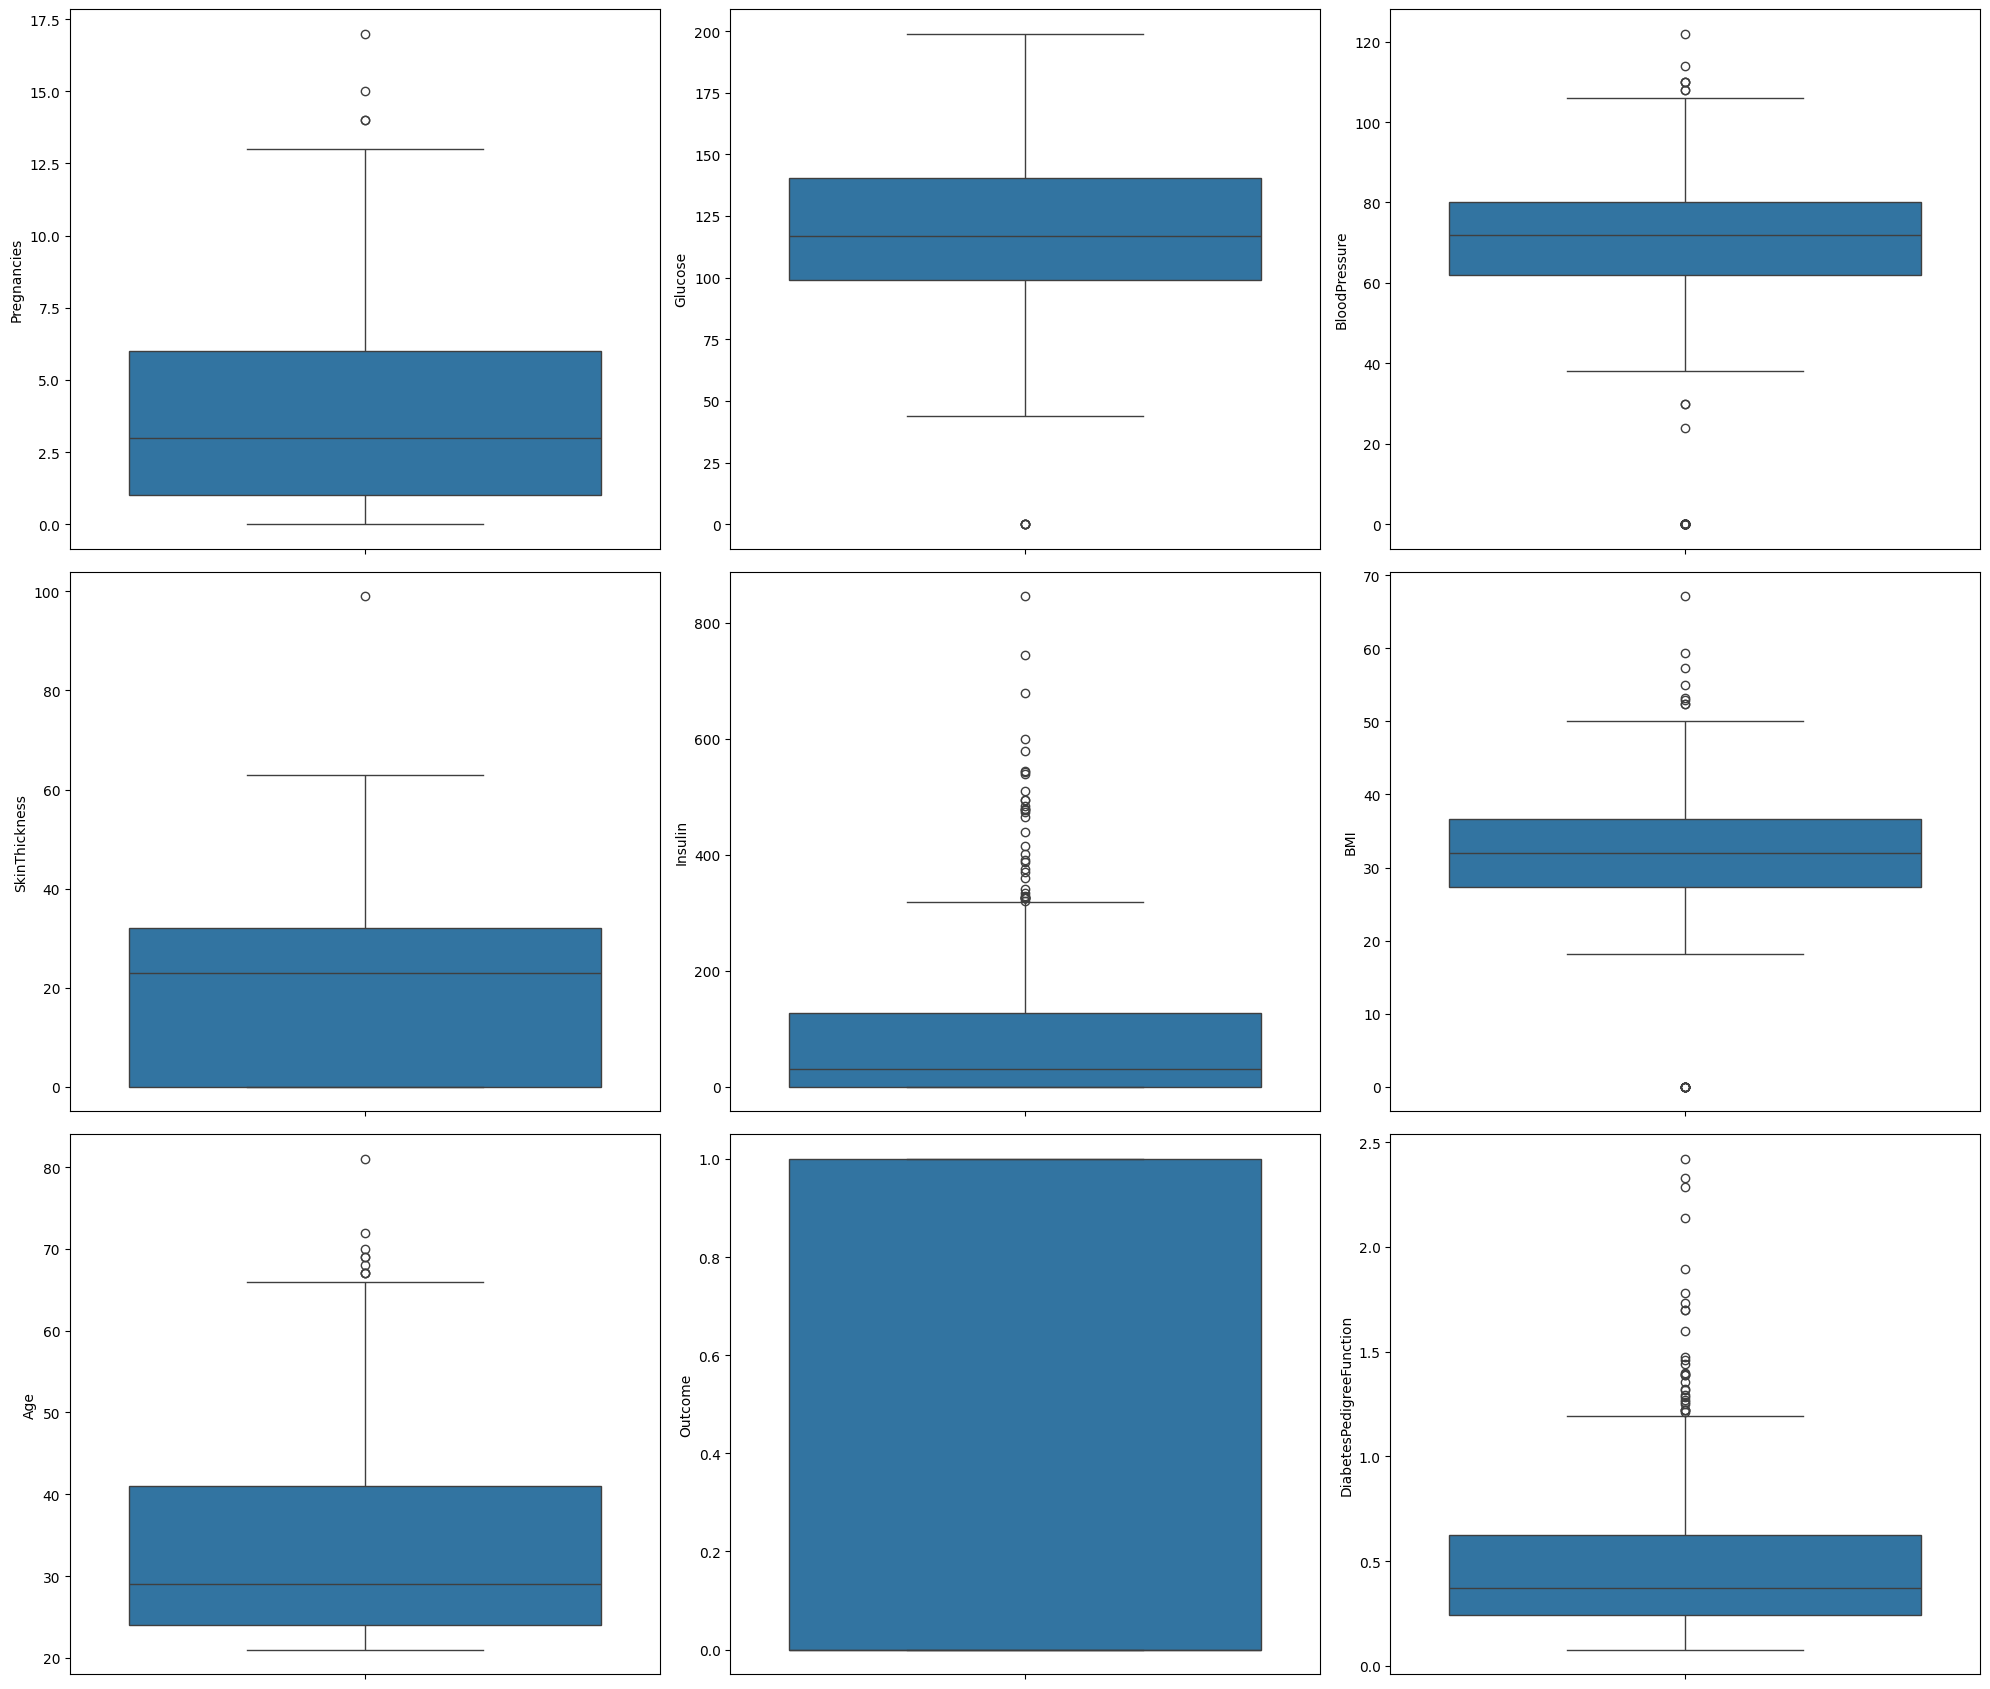

In [66]:
fig, axis = plt.subplots(3, 3, figsize = (20, 17))

sns.boxplot(ax = axis[0, 0], data = df, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = df, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = df, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = df, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = df, y = "Age")
sns.boxplot(ax = axis[2, 1], data = df, y = "Outcome")
sns.boxplot(ax = axis[2, 2], data = df, y = "DiabetesPedigreeFunction")



plt.tight_layout()

plt.show()

In [ ]:
df = df[()]

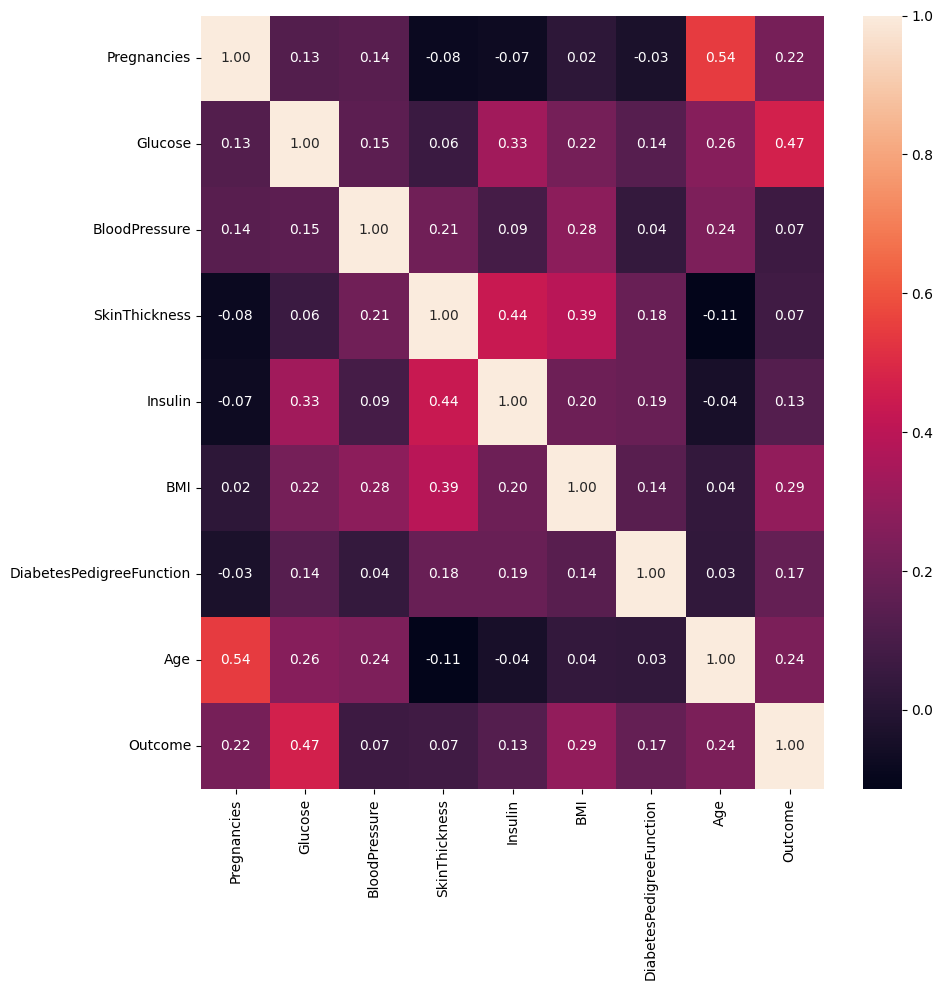

In [67]:
#correlaciones todo con todo
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()